In [33]:
import pandas as pd
import seaborn as sns

In [34]:
data=pd.read_csv('top-5000-youtube-channels.csv')

In [35]:
data

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [36]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [37]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [38]:
data.shape

(5000, 6)

In [39]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 5000
Number of Columns 6


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [41]:
pd.options.display.float_format='{:.2f}'.format

In [42]:
data.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [43]:
import numpy as np

In [44]:
data=data.replace('--',np.nan,regex=True)

In [45]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [46]:
per_missing=data.isnull().sum() *100/len(data)

<Axes: >

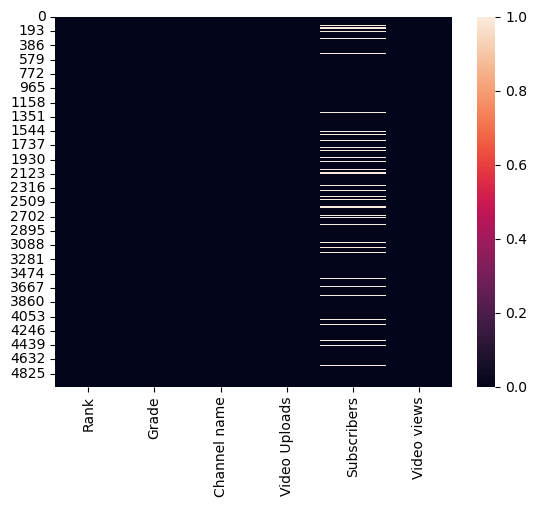

In [47]:
sns.heatmap(data.isnull())

In [48]:
data.dropna(axis=0,inplace=True)

In [49]:
data.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [52]:
data['Rank']=data['Rank'].str[0:-2]

In [56]:
data['Rank']=data['Rank'].str.replace(',','').astype('int')

In [57]:
data['Rank']

0          1
1          2
2          3
3          4
4          5
        ... 
4995    4996
4996    4997
4997    4998
4998    4999
4999    5000
Name: Rank, Length: 4610, dtype: int32

In [58]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [59]:
data['Video Uploads']=data['Video Uploads'].astype('int')

In [60]:
data['Subscribers']=data['Subscribers'].astype('int')

In [61]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [62]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [64]:
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [65]:
data.dtypes

Rank              int32
Grade             int64
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [66]:
data['Avg_views']=data['Video views']/data['Video Uploads']

In [67]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

In [70]:
data.sort_values(by='Video Uploads',ascending=False).head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,1,AP Archive,422326,746325,548619569,1299.04
1149,1150,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1,MLB,267649,1434206,1329206392,4966.23


In [73]:
data['Channel name'] = pd.to_numeric(data['Channel name'], errors='coerce')


In [74]:
data.corr()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.87,NaN,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,NaN,0.09,0.43,0.48,0.16
Channel name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Video Uploads,-0.07,0.09,NaN,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,NaN,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,NaN,0.09,0.79,1.00,0.29
Avg_views,-0.15,0.16,NaN,-0.06,0.29,0.29,1.00


In [75]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

<Axes: xlabel='Grade', ylabel='Video Uploads'>

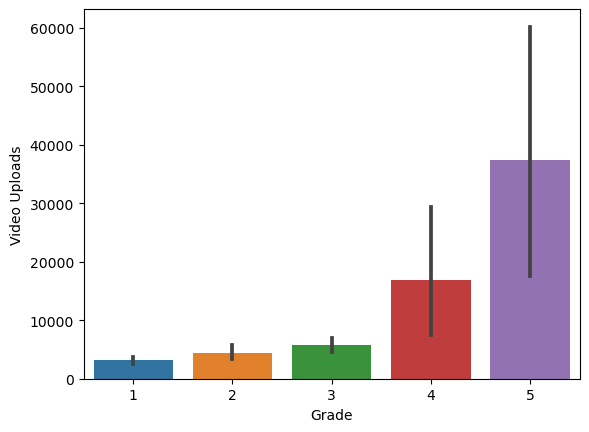

In [77]:
sns.barplot(x='Grade',y='Video Uploads',data=data)

<Axes: xlabel='Grade', ylabel='Avg_views'>

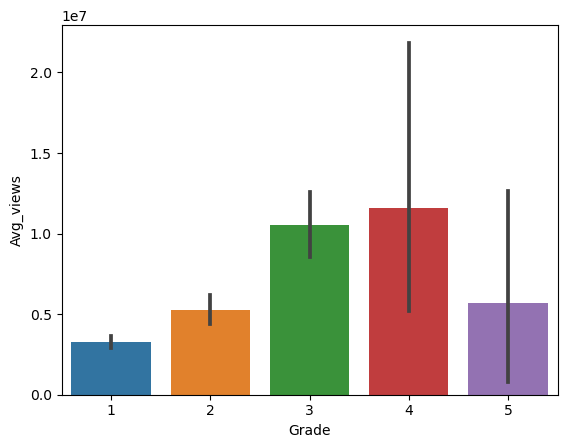

In [78]:
sns.barplot(x='Grade',y='Avg_views',data=data)

<Axes: xlabel='Grade', ylabel='Subscribers'>

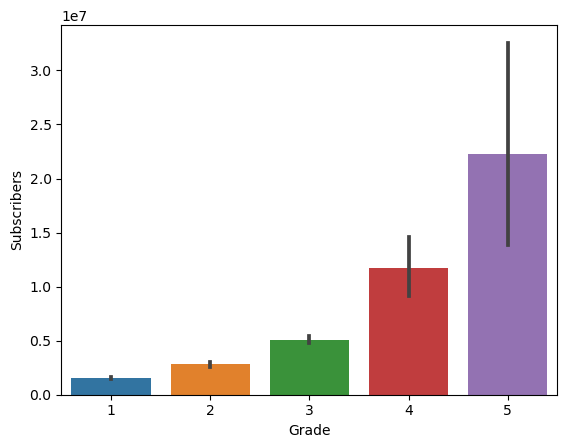

In [79]:
sns.barplot(x='Grade',y='Subscribers',data=data)

In [80]:
data.groupby('Grade').mean()

,Rank,Channel name,Video Uploads,Subscribers,Video views,Avg_views
Grade,,,,,,
1,3520.54,NaN,3136.16,1535207.95,555183839.09,3280380.88
2,1533.99,NaN,4382.58,2798520.38,1102450027.69,5254804.04
3,534.29,NaN,5709.86,5107136.29,2497972949.11,10540908.45
4,31.32,NaN,16960.30,11726947.47,6168741772.73,11577080.32
5,5.50,NaN,37450.70,22281762.50,21199091192.80,5688267.96
